# Problem Statement 11

**You are the data scientist at a retail company, and the marketing team is looking to optimize their promotional campaigns by targeting specific customer segements. The goal is to identify distinct groups os customers based on their demographic information such as age, income and spending score.**

Solution: Agglomerative Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)
data=pd.DataFrame ({'Age':np.random.randint(18,65,100),'Income':np.random.randint(30000,100000,100),'SpendingScore':np.random.randint(1,100,100)})
print (data)

    Age  Income  SpendingScore
0    56   32695             59
1    46   78190             36
2    32   35258             19
3    60   69504             90
4    25   63159             67
..  ...     ...            ...
95   24   55184             97
96   26   72107             69
97   41   81663             61
98   18   45708             48
99   61   79811             19

[100 rows x 3 columns]


In [8]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [11]:
clustering = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
data['Cluster']=clustering.fit_predict(scaled_data)

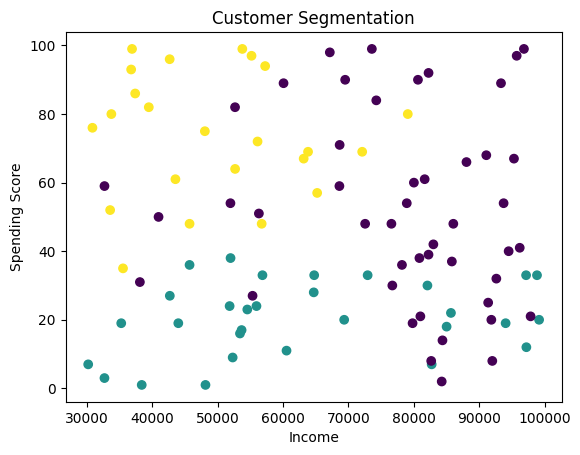

In [14]:
plt.scatter(data['Income'],data['SpendingScore'],c=data['Cluster'],cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

In [17]:
new_customer = pd.DataFrame({'Age': [30], 'Income': [50000], 'SpendingScore': [70]})
scaled_new_customer = scaler.transform(new_customer)

distances = np.linalg.norm(scaled_data - scaled_new_customer, axis=1)
closest_point_index = np.argmin(distances)
predicted_cluster = clustering.labels_[closest_point_index]

print(f"The new customer predicted cluster is: {predicted_cluster}")

The new customer predicted cluster is: 2
